### Find the values of E and S using a Gaussian fit

#### Jpype version notebook (no need to run script 8 in the Fiji script editor)

The last step of the analysis is to find the E and S values that correspond to the ensemble averages of the dataset. To do so, a Gaussian curve is fitted to the histogram. In case one population appears to be present a single Gaussian fit can be used (section 1). In the case of two populations a double Gaussian fit should be applied (section 2).

In [1]:
import imagej
# Change the path to Fiji to match your computer
ij = imagej.init('/Applications/Fiji-newtesting.app') #change this line

import jpype
import jpype.imports
import scyjava as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from java.io import File
from de.mpg.biochem.mars.molecule import SingleMoleculeArchive
import seaborn as sns
from scipy.stats import norm
from pylab import *
from scipy.optimize import curve_fit

#### Section 1: single population

In [2]:
# Load the archive you generated. Add your file path here:
yamaFile = File('/Users/nadiahuisjes/Desktop/merged_total.yama') #change this line
archive = SingleMoleculeArchive(yamaFile)

In [3]:
# Extract the values of E and S of each molecule tagged 'Active_single'
# These values will be stored in the lists E and S
E = []
S = []

for UID in archive.getMoleculeUIDs():
    molecule = archive.get(UID)
    if molecule.hasTag("Active_single"):
        E.append(molecule.getParameter("E"))
        S.append(molecule.getParameter("S"))

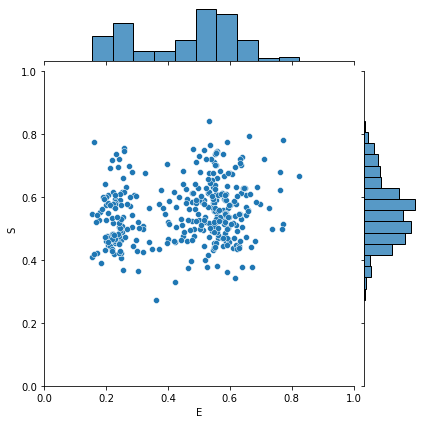

In [4]:
# Initial data exploration using a jointplot (similar to what has been plotted in Mars Rover)
df = pd.DataFrame(zip(E,S), columns = ['E','S'])
sns.jointplot(x='E', y='S', data=df, xlim = [0,1], ylim = [0,1])

Now define the gaussian function and make the fit against all E values. Print the fit parameters and corresponding errors and plot the result for a visual inspection

The fitted peak center lies at E = 0.47594529439645894 
 Sigma: 0.05224176881653524


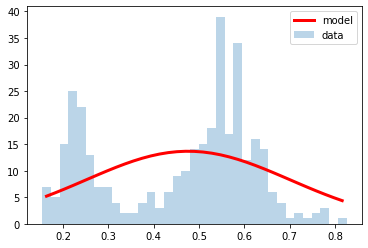

In [5]:
y,x,_=hist(E, 35, alpha=0.3,label="data")
x=(x[1:]+x[:-1])/2 #required to define x as the middle of the box

#Define the gaussian function to fit against
def gauss(x,mu,sigma,A):
    return A*exp(-(x-mu)**2/2/sigma**2)

#Make and plot the fit
expected=(0.25,0.15,33) #expected peak center, width and height (mu, sigma, A)
params,cov=curve_fit(gauss,x,y,expected)
plot(x,gauss(x,*params),color='red',lw=3,label='model')
legend()
sigma=sqrt(diag(cov))
print('The fitted peak center lies at E =',params[0],'\n','Sigma:',sigma[0]) #prints the fit parameters and errors that were found
E_fit = list(params)

The fitted peak center lies at S = 0.5402926495331324 
 Sigma: 0.00828783394777817


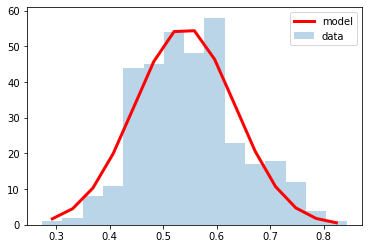

In [6]:
y,x,_=hist(S, 15, alpha=0.3,label="data")
x=(x[1:]+x[:-1])/2 #required to define x as the middle of the box

#Define the gaussian function to fit against
def gauss(x,mu,sigma,A):
    return A*exp(-(x-mu)**2/2/sigma**2)

#Make and plot the fit
expected=(0.5,0.15,18) #expected peak center, width and height (mu, sigma, A)
params,cov=curve_fit(gauss,x,y,expected)
plot(x,gauss(x,*params),color='red',lw=3,label='model')
legend()
sigma=sqrt(diag(cov))
print('The fitted peak center lies at S =', params[0],'\n','Sigma:',sigma[0]) #prints the fit parameters and errors that were found
S_fit = list(params)

#### Section 2: two populations  

In the case of analyzing the 1-lo and 1-mid data together in one archive, the scripts below should be used for fitting. These scripts take into account that two populations are to be expected in the dataset and hence do a double Gaussian fit.

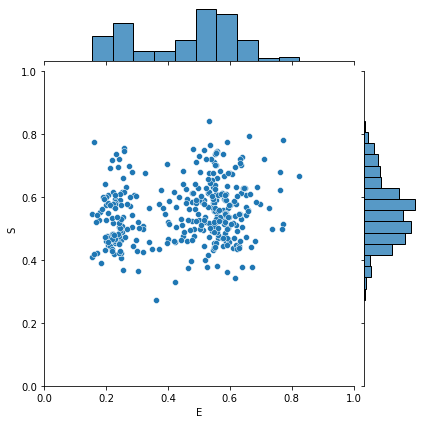

In [7]:
# Initial data exploration using a jointplot (similar to what has been plotted in Mars Rover)
df = pd.DataFrame(zip(E,S), columns = ['E','S'])
sns.jointplot(x='E', y='S', data=df, xlim = [0,1], ylim = [0,1])

Now define the double Gaussian function and make the fit for E. A bimodal fit is not required for S since the jointplot shows no different populations on that axis. To find S use the scripts from section 1. 

The fitted peak center lies at E = 0.23141809119063186 and 0.5555710136449898 
 Sigma: 0.004685316239342689 and 0.005806324693429065


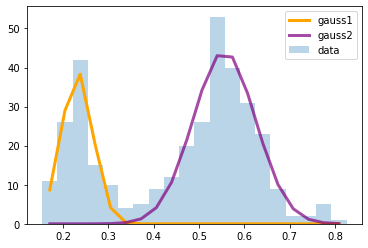

In [8]:
y,x,_=hist(E, bins = 20, alpha=0.3,label="data") #select the appropriate number of bins for the dataset
x=(x[1:]+x[:-1])/2 #required to define x as the middle of the box

#Define the bimodal function to fit against
def gauss(x,mu,sigma,A):   #can be commented out if section 1 has been run as well
    return A*exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

#Make and plot the fit
expected=(0.15,0.15,35,0.45,0.3,20) #expected peak center, width and height (mu, sigma, A) of both peaks
params,cov=curve_fit(bimodal,x,y,expected)
sigma=sqrt(diag(cov))
plot(x,gauss(x,params[0],params[1],params[2]), color='orange', lw=3, label='gauss1')
plot(x,gauss(x,params[3],params[4],params[5]), alpha=0.7, color='purple', lw=3, label='gauss2')
legend()

print('The fitted peak center lies at E =',params[0], 'and', params[3],'\n','Sigma:',sigma[0],'and',sigma[3]) #prints the fit parameters and errors that were found

The fitted peak center lies at E = 0.7265093837724966 and 0.5347755814428211 
 Sigma: 0.017791570295995048 and 0.007771651365757409


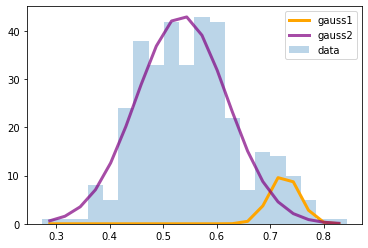

In [9]:
y,x,_=hist(S, bins = 20, alpha=0.3,label="data") #select the appropriate number of bins for the dataset
x=(x[1:]+x[:-1])/2 #required to define x as the middle of the box

#Define the bimodal function to fit against
def gauss(x,mu,sigma,A):   #can be commented out if section 1 has been run as well
    return A*exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

#Make and plot the fit
expected=(0.35,0.15,10,0.45,0.2,18) #expected peak center, width and height (mu, sigma, A) of both peaks
params,cov=curve_fit(bimodal,x,y,expected)
sigma=sqrt(diag(cov))
plot(x,gauss(x,params[0],params[1],params[2]), color='orange', lw=3, label='gauss1')
plot(x,gauss(x,params[3],params[4],params[5]), alpha=0.7, color='purple', lw=3, label='gauss2')
legend()

print('The fitted peak center lies at E =',params[0], 'and', params[3],'\n','Sigma:',sigma[0],'and',sigma[3]) #prints the fit parameters and errors that were found

In this case S does not contain multiple populations and a better fit was obtained with a single Gaussian compared to a bimodal model.